In [4]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
from tqdm import tqdm  # tqdm은 진행 상황을 표시하는 라이브러리입니다.

# 크롤링 대상 앱 정보
app_name = "kr.co.dgb.dgbm"
app_operation = reviews_all(
    app_name,
    lang='ko',
    sleep_milliseconds=100,  # defaults to 20
    country="kr"  # defaults to 'us'
)

reviews_list = []

# 리뷰 데이터 수집
for review in tqdm(app_operation):
    review_dict = {
        'review_id': review.get('reviewId', None),
        'review': review['content'],
        'score': review['score'],
        'thumbs_up_count': review['thumbsUpCount'],
        'date': review['at']  # 날짜 데이터 추가
    }
    reviews_list.append(review_dict)

# pandas DataFrame으로 변환
reviews_df = pd.DataFrame(reviews_list)
reviews_im = reviews_df

# CSV 파일로 저장
reviews_im.to_csv('im_review.csv', index=False)


100%|██████████████████████████████████████████████████████████████████████████| 2715/2715 [00:00<00:00, 769376.08it/s]


In [5]:
import pandas as pd
reviews_im  = pd.read_csv('im_review.csv')
reviews_im

,review_id,review,score,thumbs_up_count,date
0,844ad81e-0f45-4d19-9d0a-ee1ee4aebb8f,굿앱입니다.감사합니다,5,0,2024-12-10 11:08:37
1,9dabef4e-9045-4773-a257-0a682148adb5,업데이트 앱 바뀐 이후 계속 자동으로 앱 종료 되는데 해결쫌요 ㅡ ㅡ,3,0,2024-12-09 23:01:16
2,f49d952e-c2f4-4acc-b317-9edf05c2ea1e,오늘 한도제한 풀고 이체했음. 둘다 한번에 깔끔하게 안되고 두번 실행해서 성공. 다...,2,0,2024-12-09 17:40:02
3,ea3423be-9dd0-401a-ae3a-66cfce910768,현재 기기 갤럭시 S9+ 사용 중이며 One UI 버전 1.0 안드로이드 버전 9 ...,4,1,2024-12-07 10:32:21
4,7f6f4f94-16ed-4438-b30a-9e8c1ff9fa00,업데이트 왜이리 자주하냐 짜증난다,1,0,2024-12-06 22:04:42
...,...,...,...,...,...
2710,54d88448-95c1-446d-a0f3-1ef7eab0418b,"빠르고 편리하고, 모바일 지점에 교통카드 기능까지.....정말 최고에요",5,0,2015-12-21 14:09:13
2711,a42c091b-45a8-44b2-93d5-15c05eb267a3,가볍고 좋네요. 빨라진 것 같아요,5,2,2015-12-21 13:54:49
2712,54a45eac-6d98-4804-86d2-2ee332f1c19c,간편하고 빠르네요 좋아요!!,5,1,2015-12-21 13:35:30
2713,91b43a7d-4e20-4619-a882-91a408168df8,사용하기 편리한것같아요^^,5,0,2015-12-21 13:28:32


In [8]:
im_6 = reviews_im[reviews_im['date'] >= '2024-06-01']

In [10]:
im_6

,review_id,review,score,thumbs_up_count,date
0,844ad81e-0f45-4d19-9d0a-ee1ee4aebb8f,굿앱입니다.감사합니다,5,0,2024-12-10 11:08:37
1,9dabef4e-9045-4773-a257-0a682148adb5,업데이트 앱 바뀐 이후 계속 자동으로 앱 종료 되는데 해결쫌요 ㅡ ㅡ,3,0,2024-12-09 23:01:16
2,f49d952e-c2f4-4acc-b317-9edf05c2ea1e,오늘 한도제한 풀고 이체했음. 둘다 한번에 깔끔하게 안되고 두번 실행해서 성공. 다...,2,0,2024-12-09 17:40:02
3,ea3423be-9dd0-401a-ae3a-66cfce910768,현재 기기 갤럭시 S9+ 사용 중이며 One UI 버전 1.0 안드로이드 버전 9 ...,4,1,2024-12-07 10:32:21
4,7f6f4f94-16ed-4438-b30a-9e8c1ff9fa00,업데이트 왜이리 자주하냐 짜증난다,1,0,2024-12-06 22:04:42
...,...,...,...,...,...
174,6b96724b-88e1-4dc5-9241-6caa9098ff73,첨 회원가입하는데 겁나 불편함 퀵 이거 가입안하면 로그인 못하게 할거면 왜 아디 비...,1,1,2024-06-05 18:34:27
175,22d8498d-0b7d-4ac6-8918-5d0a9c711969,"처음에 간편로그인? 등록 과정중 보안카드 숫자입력란이 있더라구요, 저는 이미 수년간...",1,3,2024-06-05 14:02:16
176,e82f7145-788a-4e48-a62b-af8e03a555df,자동로그인 이후로 접속하는데 오류가 평소보다 너무 많이 발생해요 오류내용 자동로그인...,2,2,2024-06-05 13:49:07
177,135c0c8d-3986-4ba7-9190-ffb0135268fc,알람 설정을 해도 왜 입출금 알람이 오지를 않아요 ?? 광고 알람은 잘 오는데,3,1,2024-06-03 08:38:46


In [10]:
im_6['score'].value_counts()

score
1    107
5     45
2     11
3      8
4      7
Name: count, dtype: int64

In [12]:
im_6 = im_6[im_6['score'] <2]

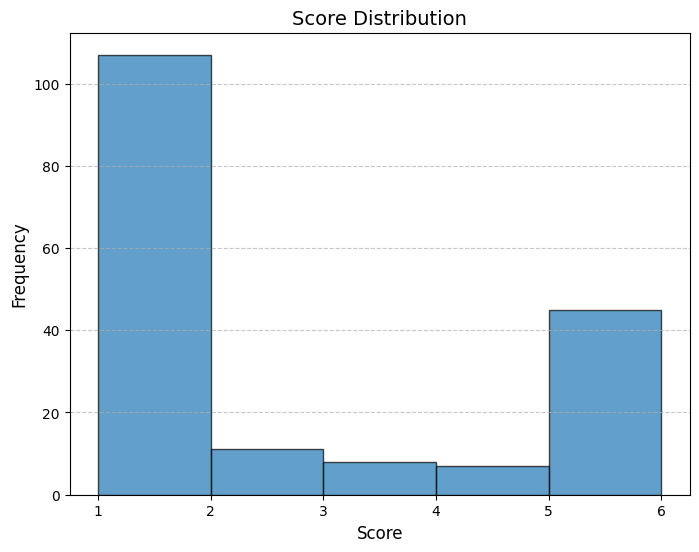

In [12]:
import matplotlib.pyplot as plt

# 예제 데이터 (im_6['score'] 값)
# 실제 데이터로 바꿔 실행하세요!
score_data = im_6['score']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(score_data, bins=range(min(score_data), max(score_data) + 2), edgecolor='black', alpha=0.7)
plt.title('Score Distribution', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
review_all = '.'.join(im_6['review'])

In [16]:
review_all

'업데이트 왜이리 자주하냐 짜증난다.하...잘 되다가 최근에 앱 이 갑자기 실행이 안됩니다 안드로이드 버전이 낮아 그럴까요 갤 s7입니다.몇년이나 잘되던 앱이 연결중지됨 뜨고 팅깁니다. 뭔말을해주고 팅기던가! 급한뱅킹해야되는데! 뭐때문인지 답하시요. 앱 제거하고 다시깔아서 해도 안됨! 데이터 다 날아가구로!.잘되다 갑자기 앱 중지가 뜨면서 안되네요 삭제했다 다시 깔아봐도 안됨.앱탈퇴 어떻게하나요?????????????????.지역 이름딴 은행어플은 가입도 짜증나네요. 처음서봤는데 다른 은행어플과 달리 인증도 뭐이리 많은지요? 보안시스템이 안좋아서 사용자 정보보안으로 커버하려는건지 모르겠는데, 신분증 뿐 아니라 얼굴사진도 찍으라 그러고 가입자체가 좀 유별나네요. 다시는 거래하고싶지 않은 은행과 앱이네요. 덕분에 카드발급받은것도 찢어버렸습니다. 타 은행 어플처럼 심플하게 만드세요..이건해도해도너무하네 본인인증했는데 잘안되고 로그인안되고 패턴안되고.접속이되야평가를할꺼아입니까ㅡㅡ 화면아예뜨질않아요.쓰레기앱.앱이 안열려요 개선좀.거지같은 업데이트해놨네 퀵인증 무슨 보안카드 타령이야 하기싫다고 그리고 그딴 카드 집구석에 쳐박아놨는데 출장가있는데 내가 그걸 언제 가져가냐 아 진짜 생각없이 일하는것도 아니고 하고싶은사람만 설정 해놓게하시라고요 주택청약 월납입 오른것도 열받는데 이런 쓰잘데기 없는것까지 화딱지나게하네 뭐 어쩌란거냐 그거 가지러갈시간도 없다고 아오.쓰레기같은앱임.접속 비밀번호를 잊었으면 접속 비밀번호 변경에서 바꾸라고 해놓고 접속 비밀번호 변경에 들어가려면 로그인을 하라네.앱개발자님. 이건 진짜 너무한 거 아니에요? 아파트관리비 자동납부 신청하려니까 계좌비밀번호에 앱비밀번호에 디지털otp번호까지 입력하래. 그래요 다 입력은 하겠는데 디지털otp입력하는 화면에서 otp번호생성 누르면 생성하는 화면으로 접속하고, otp번호생성하고 나면 다시 원상태로 자동납부신청화면으로 되돌아와야 otp번호를 넣을꺼 아녜요? otp번호생성 후 자동로그아웃 시켜버리면 도대체 어쩌란거?

In [18]:
from konlpy.tag import Okt

okt = Okt()

In [19]:
review_noun = okt.nouns(review_all) 

In [20]:
review_noun

['업데이트',
 '왜',
 '자주',
 '최근',
 '앱',
 '이',
 '갑자기',
 '실행',
 '안드로이드',
 '버전',
 '요',
 '년',
 '앱',
 '연결',
 '말',
 '뱅킹',
 '뭐',
 '때문',
 '답',
 '앱',
 '제거',
 '다시',
 '해도',
 '데이터',
 '갑자기',
 '앱',
 '중지',
 '삭제',
 '다시',
 '앱',
 '탈퇴',
 '하나요',
 '지역',
 '이름',
 '은행',
 '어플',
 '가입',
 '처음',
 '다른',
 '은행',
 '어플',
 '달리',
 '인증',
 '뭐',
 '보안',
 '시스템',
 '사용자',
 '정보보안',
 '커버',
 '신분증',
 '뿐',
 '얼굴',
 '사진',
 '가입',
 '자체',
 '좀',
 '거래',
 '은행',
 '앱',
 '요',
 '덕분',
 '카드',
 '발급',
 '타',
 '은행',
 '어플',
 '심플',
 '이건',
 '해도',
 '본인',
 '인증',
 '로그인',
 '패턴',
 '접속',
 '평가',
 '입',
 '화면',
 '아예',
 '쓰레기',
 '앱',
 '앱',
 '개선',
 '좀',
 '업데이트',
 '퀵',
 '인증',
 '무슨',
 '보안',
 '카드',
 '타령',
 '카드',
 '집',
 '구석',
 '출장',
 '내',
 '언제',
 '진짜',
 '생각',
 '일',
 '사람',
 '설정',
 '주택',
 '청약',
 '월납입',
 '열',
 '화',
 '뭐',
 '어쩌란거',
 '그거',
 '시간',
 '쓰레기',
 '앱임',
 '접속',
 '비밀번호',
 '접속',
 '비밀번호',
 '변경',
 '접속',
 '비밀번호',
 '변경',
 '로그인',
 '하라',
 '앱',
 '개발자',
 '이건',
 '진짜',
 '거',
 '아파트',
 '관리',
 '비',
 '자동',
 '납부',
 '신청',
 '계좌',
 '비밀번호',
 '앱',
 '비밀번호',
 '디지털',
 '번호',
 '입력',
 '하래',
 '입력',
 '디

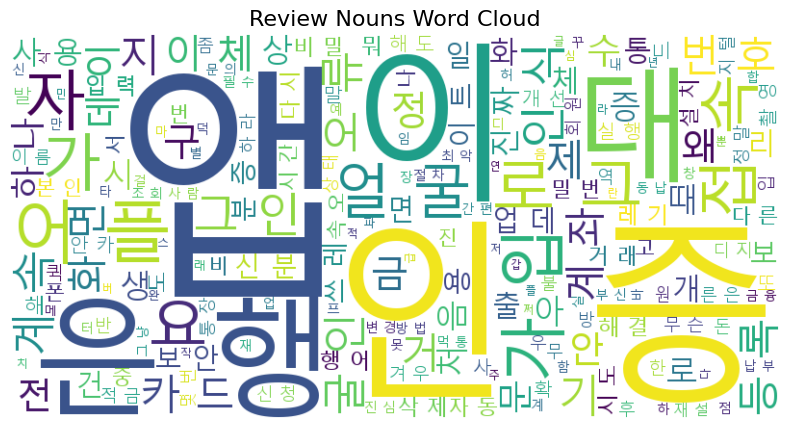

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 명사 리스트를 하나의 문자열로 결합
all_nouns = ' '.join([' '.join(nouns) for nouns in review_noun])

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로 (필요 시 설정, 예: 'NanumGothic.ttf')
    width=800,
    height=400,
    background_color='white'
).generate(all_nouns)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Review Nouns Word Cloud', fontsize=16)
plt.show()


# 불용어 처리

In [24]:
stopwords = ['은행','어플','진짜','계속','처음','다시']

filtered_nouns = [word for word in review_noun if word not in stopwords and len(word) > 1]
filtered_nouns

['업데이트',
 '자주',
 '최근',
 '갑자기',
 '실행',
 '안드로이드',
 '버전',
 '연결',
 '뱅킹',
 '때문',
 '제거',
 '해도',
 '데이터',
 '갑자기',
 '중지',
 '삭제',
 '탈퇴',
 '하나요',
 '지역',
 '이름',
 '가입',
 '다른',
 '달리',
 '인증',
 '보안',
 '시스템',
 '사용자',
 '정보보안',
 '커버',
 '신분증',
 '얼굴',
 '사진',
 '가입',
 '자체',
 '거래',
 '덕분',
 '카드',
 '발급',
 '심플',
 '이건',
 '해도',
 '본인',
 '인증',
 '로그인',
 '패턴',
 '접속',
 '평가',
 '화면',
 '아예',
 '쓰레기',
 '개선',
 '업데이트',
 '인증',
 '무슨',
 '보안',
 '카드',
 '타령',
 '카드',
 '구석',
 '출장',
 '언제',
 '생각',
 '사람',
 '설정',
 '주택',
 '청약',
 '월납입',
 '어쩌란거',
 '그거',
 '시간',
 '쓰레기',
 '앱임',
 '접속',
 '비밀번호',
 '접속',
 '비밀번호',
 '변경',
 '접속',
 '비밀번호',
 '변경',
 '로그인',
 '하라',
 '개발자',
 '이건',
 '아파트',
 '관리',
 '자동',
 '납부',
 '신청',
 '계좌',
 '비밀번호',
 '비밀번호',
 '디지털',
 '번호',
 '입력',
 '하래',
 '입력',
 '디지털',
 '입력',
 '화면',
 '번호',
 '화면',
 '접속',
 '번호',
 '상태',
 '자동',
 '납부',
 '신청',
 '화면',
 '번호',
 '번호',
 '자동',
 '로그아웃',
 '도대체',
 '어쩌란거',
 '번호',
 '가지',
 '자동',
 '납부',
 '신청',
 '지금',
 '벌써',
 '자동',
 '납부',
 '신청',
 '건가',
 '때문',
 '방문',
 '운용',
 '대출',
 '우대금리',
 '적용',
 '덕지덕지',
 '조건',
 '우대금리',
 '조건',


In [25]:
df_n = pd.DataFrame(filtered_nouns)
df_n = pd.DataFrame(df_n.value_counts()).reset_index()
df_n.columns=['명사','count']
df_n

,명사,count
0,인증,38
1,가입,25
2,접속,22
3,로그인,20
4,오류,19
...,...,...
376,불편,1
377,보험,1
378,보완,1
379,보드,1


In [26]:
word_dict = dict(zip(df_n['명사'], df_n['count']))
word_dict

{'인증': 38,
 '가입': 25,
 '접속': 22,
 '로그인': 20,
 '오류': 19,
 '얼굴': 18,
 '인식': 18,
 '계좌': 15,
 '등록': 15,
 '화면': 14,
 '이체': 14,
 '카드': 13,
 '쓰레기': 9,
 '입력': 9,
 '신분증': 9,
 '업데이트': 9,
 '번호': 9,
 '비밀번호': 8,
 '해결': 8,
 '자동': 8,
 '사용': 8,
 '보안': 8,
 '설치': 8,
 '시도': 7,
 '거래': 7,
 '본인': 7,
 '시간': 7,
 '삭제': 7,
 '실행': 6,
 '다른': 6,
 '촬영': 6,
 '개선': 6,
 '해도': 6,
 '통신': 5,
 '통장': 5,
 '정말': 5,
 '상태': 5,
 '무슨': 5,
 '몇번': 5,
 '대구': 5,
 '자체': 5,
 '적금': 5,
 '디지털': 5,
 '제대로': 5,
 '확인': 5,
 '하라': 5,
 '이름': 5,
 '겨우': 5,
 '하나': 5,
 '회원': 5,
 '비번': 4,
 '조회': 4,
 '간편': 4,
 '그냥': 4,
 '대출': 4,
 '최악': 4,
 '하나요': 4,
 '절차': 4,
 '먹통': 4,
 '방법': 4,
 '데이터': 4,
 '납부': 4,
 '변경': 4,
 '전화': 4,
 '인증서': 4,
 '문의': 4,
 '필수': 4,
 '이건': 4,
 '금융': 4,
 '진심': 4,
 '신청': 4,
 '잘만': 3,
 '불가': 3,
 '동안': 3,
 '자꾸': 3,
 '사람': 3,
 '얼굴인식': 3,
 '요구': 3,
 '때문': 3,
 '해지': 3,
 '네트워크': 3,
 '출금': 3,
 '사진': 3,
 '누가': 3,
 '이제': 3,
 '문제': 3,
 '기존': 3,
 '가요': 3,
 '센터': 3,
 '안면': 3,
 '코드': 3,
 '다음': 3,
 '설정': 3,
 '주민': 3,
 '아이디': 3,
 '방문': 3,
 '지금': 3,
 

In [41]:
# 색상 함수 정의
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 단어의 빈도수를 비교
    if word_dict[word] >= a:
        return "red"  # 빨강
    elif word_dict[word] >= b:
        return "orange"

    else:
        return "gray"  # 회색

a = pd.Series(word_dict.values()).quantile(0.99)
b = pd.Series(word_dict.values()).quantile(0.98)


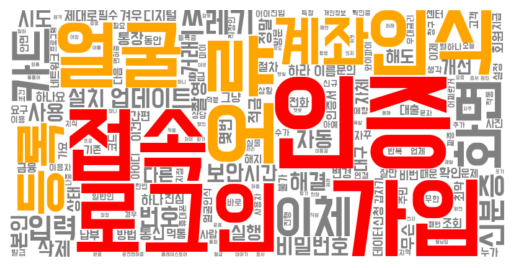

In [43]:
import numpy as np
import pandas as pd

# WordCloud 생성
wc = WordCloud(   width=800,  # 워드클라우드의 너비
    height=400, 
    background_color='white',
    font_path='BMDOHYEON_ttf.ttf'
).generate_from_frequencies(word_dict)  # 데이터프레임을 딕셔너리로 변환

# 색상 적용
wc = wc.recolor(color_func=custom_color_func)

# WordCloud 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

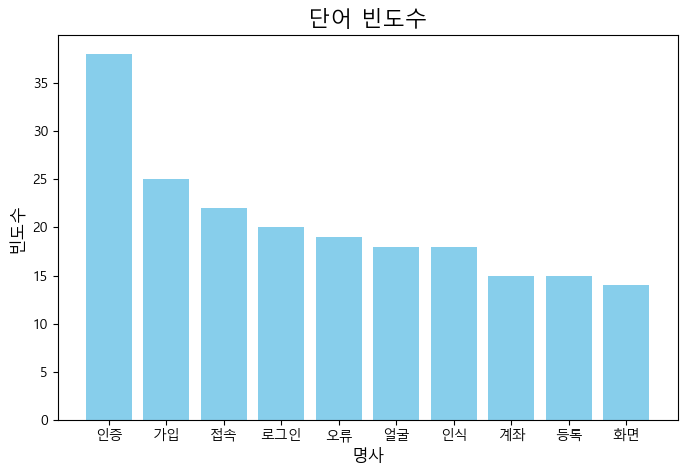

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 글꼴 설정 (Windows 예: 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'


data = df_n.head(10)
# 바플롯 생성
plt.figure(figsize=(8, 5))
plt.bar(data['명사'], data['count'], color='skyblue')

# 플롯 꾸미기
plt.title('단어 빈도수', fontsize=16)
plt.xlabel('명사', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [46]:
data

,명사,count
0,인증,38
1,가입,25
2,접속,22
3,로그인,20
4,오류,19
5,얼굴,18
6,인식,18
7,계좌,15
8,등록,15
9,화면,14
